# ANALYSIS OF CRIME AGAINST WOMEN IN INDIA

This data is collected from https://data.gov.in. 
It has state-wise and district level data on the various crimes committed against women in India between 2001 to 2014.



### Importing the libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

#### Importing the dataset and displaying first five rows

In [2]:
df=pd.read_csv("crimes_against_women_2001-2014.csv")
df = df[df.DISTRICT != 'TOTAL']
df

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10669,829,Delhi UT,Vigilance,2014,0,0,0,0,0,0,0
10670,830,Delhi UT,West,2014,251,546,13,484,63,416,0
10672,832,Lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3,1,0,12,1,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10186 entries, 0 to 10675
Data columns (total 11 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Unnamed: 0                                           10186 non-null  int64 
 1   STATE/UT                                             10186 non-null  object
 2   DISTRICT                                             10186 non-null  object
 3   Year                                                 10186 non-null  int64 
 4   Rape                                                 10186 non-null  int64 
 5   Kidnapping and Abduction                             10186 non-null  int64 
 6   Dowry Deaths                                         10186 non-null  int64 
 7   Assault on women with intent to outrage her modesty  10186 non-null  int64 
 8   Insult to modesty of Women                           10186 non-null  int64 


### Data preprocessing

In [4]:
df.isnull().sum()

Unnamed: 0                                             0
STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

In [5]:
#removing the unnamed column
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [6]:
print(df['STATE/UT'].unique())
len(df['STATE/UT'].unique())

['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI' 'LAKSHADWEEP'
 'PUDUCHERRY' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chhattisgarh' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal' 'A&N Islands' 'Chandigarh' 'D&N Haveli'
 'Daman & Diu' 'Delhi UT' 'Lakshadweep' 'Puducherry' 'Telangana'
 'A & N Islands']


72

In [7]:
df['STATE/UT'].replace("A&N Islands", "A & N ISLANDS", inplace = True)
df['STATE/UT'].replace("D&N Haveli", "D & N HAVELI", inplace = True)
df['STATE/UT'].replace("Delhi UT", "DELHI", inplace = True)
df['STATE/UT'] = df['STATE/UT'].map(str.upper)
print("Unique States and Union Territories")
print(df['STATE/UT'].unique())
len(df['STATE/UT'].unique())

Unique States and Union Territories
['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI' 'LAKSHADWEEP'
 'PUDUCHERRY' 'TELANGANA']


36

In [8]:
# sum of all crimes as total crimes
df['total_crimes']=(df['Rape']+df['Kidnapping and Abduction']+df['Dowry Deaths']+
                       df['Assault on women with intent to outrage her modesty']+
                       df['Insult to modesty of Women']+df['Cruelty by Husband or his Relatives']+
                       df['Importation of Girls'])
df.head()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0,454
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0,356
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0,456
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0,475


In [9]:
# reset the index
total = df.groupby('STATE/UT').sum()
total = total.reset_index()
total.head()

,STATE/UT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
0,A & N ISLANDS,60242,168,106,10,300,56,144,0,784
1,ANDHRA PRADESH,825100,16075,17252,6922,63476,43482,140453,17,287677
2,ARUNACHAL PRADESH,441739,658,735,3,998,24,238,0,2656
3,ASSAM,823141,20095,31037,1634,19128,127,57650,11,129682
4,BIHAR,1240648,15379,28543,16103,8479,347,34885,452,104188


### Analysis and Visualization

#### 1. Bar plot: Total number of crimes occuring in each state
#### 2. Line chart: Year-wise crime rate line graph of all crimes
#### 3. Bar plot: Statewise total number of cases of Rape
#### 4. Line plot: Year-wise rape cases (Increasing trend), Year-wise Importation of Girls (Decreasing trend)
#### 5. Choropleth map             
#### 6. Bubble map

In [10]:
# Bar plot

In [11]:
total = total.sort_values('total_crimes', ascending=False)
total.head()

,STATE/UT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
33,UTTAR PRADESH,2043742,25575,67953,28628,45606,26565,96869,3,291199
1,ANDHRA PRADESH,825100,16075,17252,6922,63476,43482,140453,17,287677
35,WEST BENGAL,714753,23938,30579,6154,33454,2674,172062,127,268988
28,RAJASTHAN,1058154,22842,33139,5927,41681,397,131100,7,235093
19,MADHYA PRADESH,1455541,45498,17804,10545,97739,10482,51408,67,233543


In [12]:
total.tail()

,STATE/UT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
29,SIKKIM,114434,285,90,2,293,17,54,0,741
24,NAGALAND,297134,281,95,1,130,12,16,1,536
7,D & N HAVELI,28105,66,112,1,53,6,45,0,283
8,DAMAN & DIU,56210,30,22,3,20,2,38,0,115
18,LAKSHADWEEP,28105,10,1,0,7,2,7,0,27


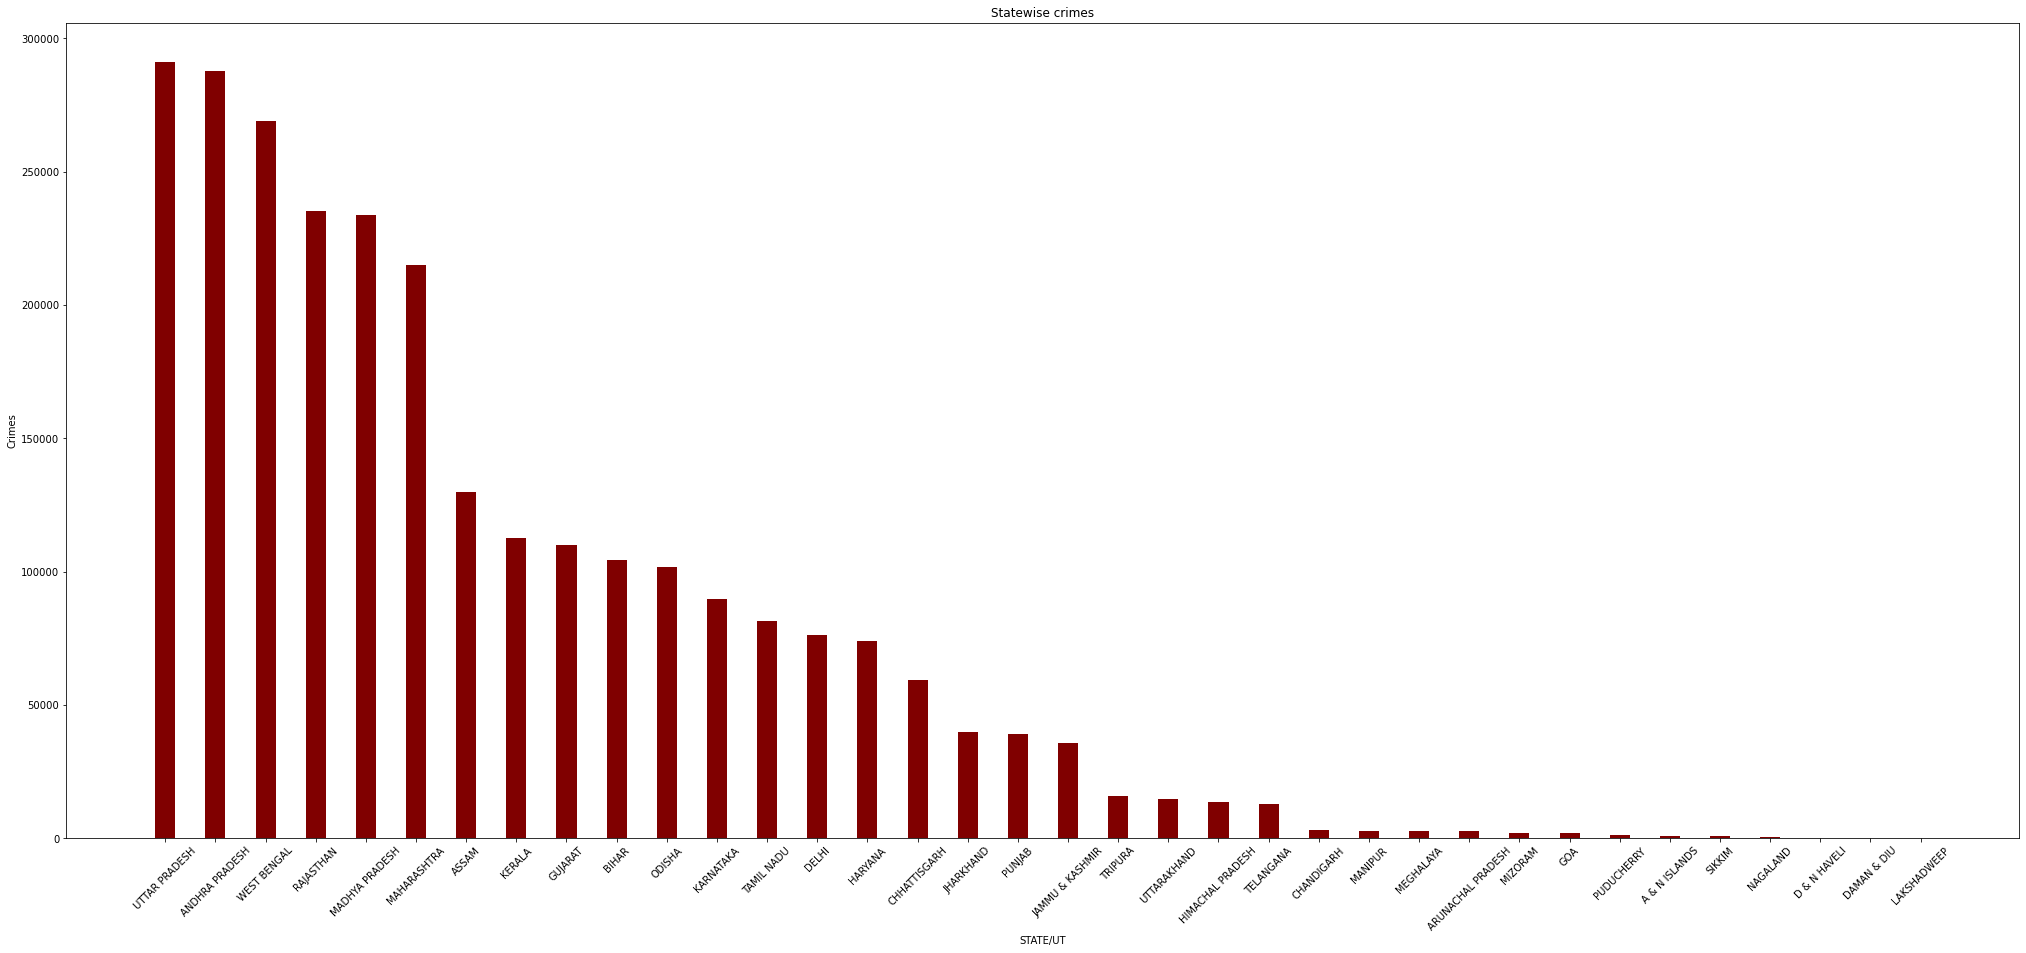

<Figure size 432x288 with 0 Axes>

In [13]:
fig = plt.figure(figsize = (10, 5))
fig.set_figwidth(35)
fig.set_figheight(15) 
# creating the bar plot
plt.bar(total['STATE/UT'], total['total_crimes'], color ='maroon',
        width = 0.4)
plt.xlabel("STATE/UT")
plt.ylabel("Crimes")
plt.title("Statewise crimes")
plt.xticks(rotation=45)
plt.show()
plt.savefig('stateandtotalcrimes.jpg',bbox_inches='tight', dpi=150)

In [14]:
# Line plot

In [15]:
#total_crimes
crimes=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls']

df1=pd.DataFrame()  
for i in crimes:
    df_crimes=df.groupby(['Year'])[i].sum()
    df1[i]=df_crimes
df1 = df1.reset_index()
print("Total number of crimes from 2001 to 2014")
df1.head()

Total number of crimes from 2001 to 2014


,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,2001,16075,14645,6851,34124,9746,49170,114
1,2002,16373,14506,6822,33943,10155,49237,76
2,2003,15847,13296,6208,32939,12325,50703,46
3,2004,18233,15578,7026,34567,10001,58121,89
4,2005,18359,15750,6787,34175,9984,58319,149


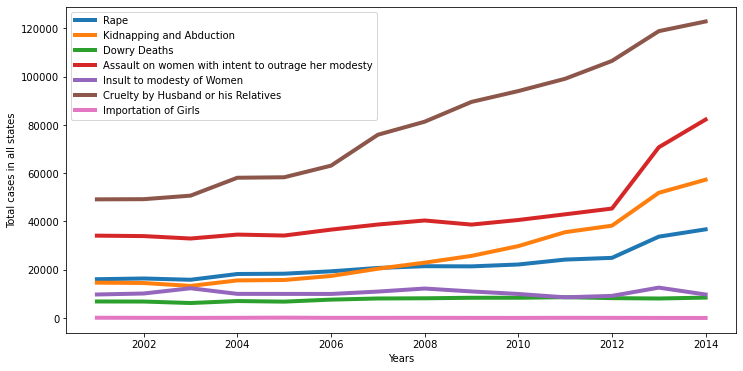

<Figure size 432x288 with 0 Axes>

In [16]:
# Plot a line chart
fig = plt.figure(figsize = (10, 5))
fig.set_figwidth(12)
fig.set_figheight(6) 
plt.plot(df1['Year'], df1['Rape'], label='Rape', linewidth=4)
plt.plot(df1['Year'], df1['Kidnapping and Abduction'], label='Kidnapping and Abduction',linewidth=4)
plt.plot(df1['Year'], df1['Dowry Deaths'], label='Dowry Deaths',linewidth=4)
plt.plot(df1['Year'], df1['Assault on women with intent to outrage her modesty'], label='Assault on women with intent to outrage her modesty',linewidth=4)
plt.plot(df1['Year'], df1['Insult to modesty of Women'], label='Insult to modesty of Women',linewidth=4)
plt.plot(df1['Year'], df1['Cruelty by Husband or his Relatives'], label='Cruelty by Husband or his Relatives',linewidth=4)
plt.plot(df1['Year'], df1['Importation of Girls'], label='Importation of Girls',linewidth=4)
plt.xlabel('Years')
plt.ylabel('Total cases in all states')
plt.legend()
plt.show()
plt.savefig('linechart.jpg',bbox_inches='tight', dpi=150)

In [17]:
# Bar plot

In [18]:
total_crimes = df.groupby('STATE/UT').sum()
total_crimes.head()

,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
STATE/UT,,,,,,,,,
A & N ISLANDS,60242,168,106,10,300,56,144,0,784
ANDHRA PRADESH,825100,16075,17252,6922,63476,43482,140453,17,287677
ARUNACHAL PRADESH,441739,658,735,3,998,24,238,0,2656
ASSAM,823141,20095,31037,1634,19128,127,57650,11,129682
BIHAR,1240648,15379,28543,16103,8479,347,34885,452,104188


In [19]:
total_crimes = total_crimes.sort_values('Rape', ascending=False)

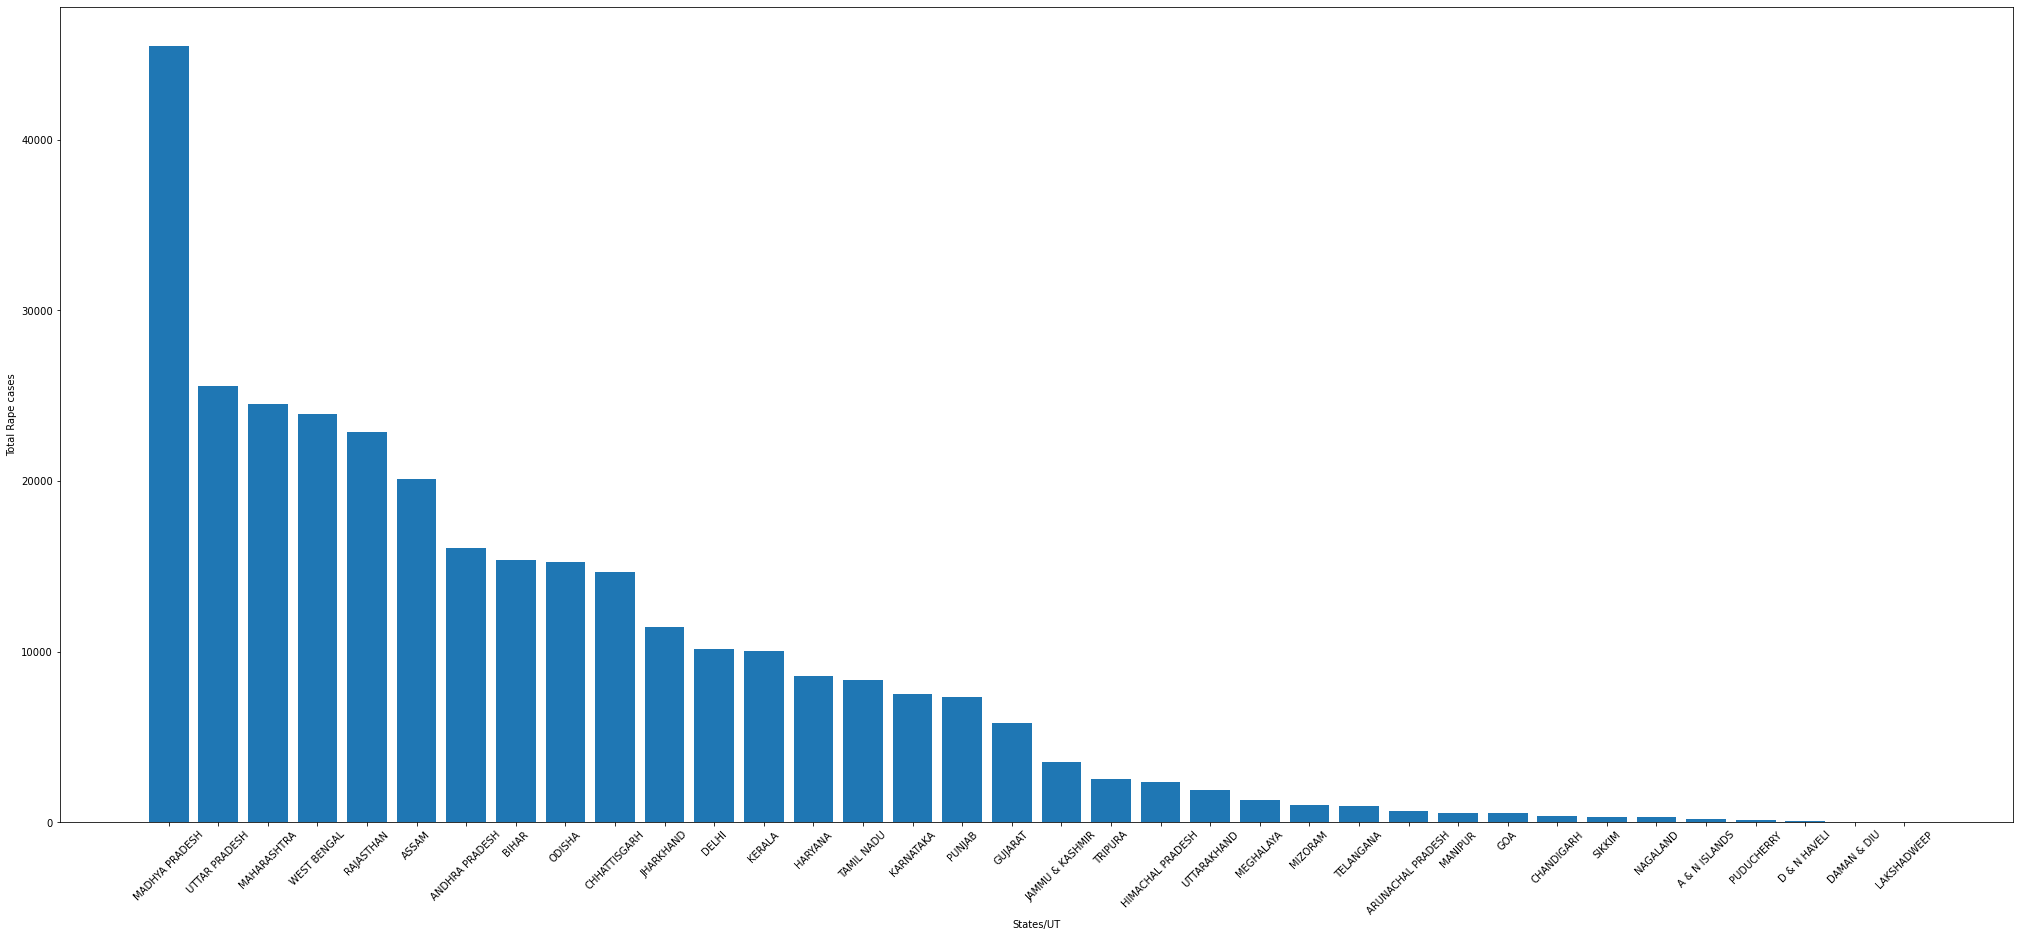

In [20]:
f = plt.figure()
f.set_figwidth(35)
f.set_figheight(15)
total_crimes = total_crimes.reset_index()
plt.bar(total_crimes['STATE/UT'], total_crimes['Rape'], label='Rape')
plt.xticks(rotation=45)
plt.xlabel('States/UT')
plt.ylabel('Total Rape cases')
plt.savefig('statewise_import.jpg',bbox_inches='tight', dpi=150)

In [21]:
# Line plot

In [22]:
df1.reset_index()
df1.head()
pred_rape = df1.iloc[:, [0, 1]]
pred_rape.head()
pred_rape.index = pred_rape['Year']
del pred_rape['Year']
pred_rape.head()

,Rape
Year,
2001,16075
2002,16373
2003,15847
2004,18233
2005,18359


In [23]:
pred_import = df1.iloc[:, [0, 7]]
pred_import.head()
pred_import.index = pred_import['Year']
del pred_import['Year']
pred_import.head()

,Importation of Girls
Year,
2001,114
2002,76
2003,46
2004,89
2005,149


<AxesSubplot:xlabel='Year'>

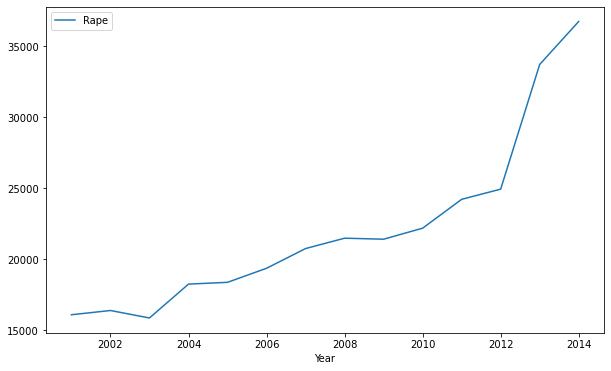

In [24]:
pred_rape.plot(figsize=(10, 6))

<AxesSubplot:xlabel='Year'>

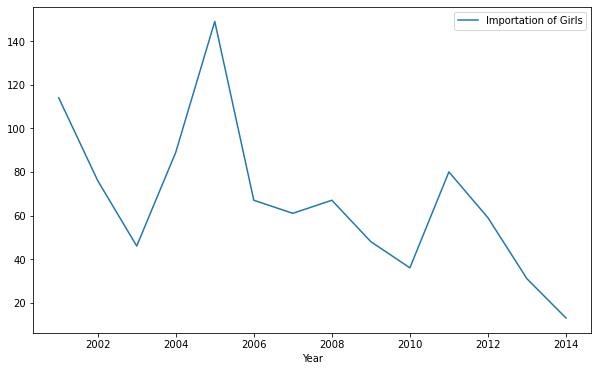

In [25]:
pred_import.plot(figsize=(10, 6))

In [26]:
# choropleth map

In [27]:
total_crimes = total_crimes.reset_index()

In [28]:
crimes = total_crimes.iloc[:, [1,-1]]
crimes.head()

,STATE/UT,total_crimes
0,MADHYA PRADESH,233543
1,UTTAR PRADESH,291199
2,MAHARASHTRA,214792
3,WEST BENGAL,268988
4,RAJASTHAN,235093


In [29]:
import geopandas as gpd
shp_file = gpd.read_file('Indian_states/Indian_states.shp')
shp_file.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [30]:
shp_file['st_nm'] = shp_file['st_nm'].map(str.upper)
shp_file.head()

,st_nm,geometry
0,ANDAMAN & NICOBAR ISLAND,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,ARUNANCHAL PRADESH,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,ASSAM,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,BIHAR,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,CHANDIGARH,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [31]:
shp_file['st_nm'].replace("ANDAMAN & NICOBAR ISLAND", "A & N ISLANDS", inplace = True)
shp_file['st_nm'].replace("DADARA & NAGAR HAVELLI", "D & N HAVELI", inplace = True)
shp_file['st_nm'].replace("NCT OF DELHI", "DELHI", inplace = True)
shp_file['st_nm'].replace("ARUNANCHAL PRADESH", "ARUNACHAL PRADESH", inplace = True)
shp_file.head()

,st_nm,geometry
0,A & N ISLANDS,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,ARUNACHAL PRADESH,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,ASSAM,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,BIHAR,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,CHANDIGARH,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [32]:
merged2 = shp_file.set_index('st_nm').join(crimes.set_index('STATE/UT'))
merged2.head()

,geometry,total_crimes
st_nm,,
A & N ISLANDS,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",784
ARUNACHAL PRADESH,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",2656
ASSAM,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",129682
BIHAR,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",104188
CHANDIGARH,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",3026


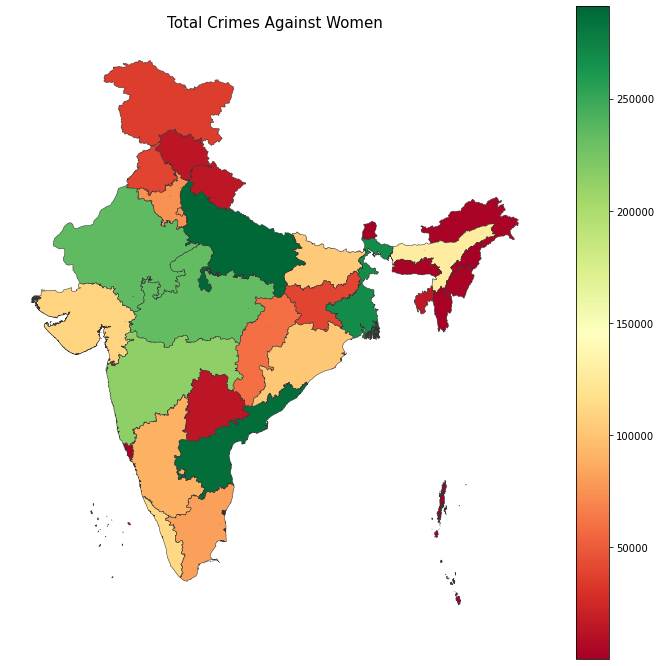

In [33]:
# choropleth map
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Total Crimes Against Women', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged2.plot(column='total_crimes', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

In [34]:
# bubble map

In [35]:
coordinates = pd.read_csv("latandlon.csv")
coordinates.head()

,State,Latitude,Longitude
0,Andaman and Nicobar Islands,11.667026,92.735983
1,Andhra Pradesh,17.686800,83.218500
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [36]:
total_crimes = total_crimes.reset_index()
total_crimes.head()

,level_0,index,STATE/UT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
0,0,0,MADHYA PRADESH,1455541,45498,17804,10545,97739,10482,51408,67,233543
1,1,1,UTTAR PRADESH,2043742,25575,67953,28628,45606,26565,96869,3,291199
2,2,2,MAHARASHTRA,1266739,24487,15184,4848,57352,16317,96601,3,214792
3,3,3,WEST BENGAL,714753,23938,30579,6154,33454,2674,172062,127,268988
4,4,4,RAJASTHAN,1058154,22842,33139,5927,41681,397,131100,7,235093


In [37]:
crimes = total_crimes.iloc[:, [2,-1]]
crimes.head()

,STATE/UT,total_crimes
0,MADHYA PRADESH,233543
1,UTTAR PRADESH,291199
2,MAHARASHTRA,214792
3,WEST BENGAL,268988
4,RAJASTHAN,235093


In [38]:
coordinates['State'] = coordinates['State'].map(str.upper)
coordinates.head()

,State,Latitude,Longitude
0,ANDAMAN AND NICOBAR ISLANDS,11.667026,92.735983
1,ANDHRA PRADESH,17.686800,83.218500
2,ARUNACHAL PRADESH,27.100399,93.616601
3,ASSAM,26.749981,94.216667
4,BIHAR,25.785414,87.479973


In [39]:
coordinates['State'].replace("ANDAMAN AND NICOBAR ISLANDS", "A & N ISLANDS", inplace = True)
coordinates['State'].replace("DADRA AND NAGAR HAVELI AND DAMAN AND DIU", "D & N HAVELI", inplace = True)
coordinates['State'].replace("JAMMU AND KASHMIR", "JAMMU & KASHMIR", inplace = True)
coordinates.head()

,State,Latitude,Longitude
0,A & N ISLANDS,11.667026,92.735983
1,ANDHRA PRADESH,17.686800,83.218500
2,ARUNACHAL PRADESH,27.100399,93.616601
3,ASSAM,26.749981,94.216667
4,BIHAR,25.785414,87.479973


In [40]:
merged = crimes.join(coordinates.set_index('State'), on = 'STATE/UT')
merged.head()

,STATE/UT,total_crimes,Latitude,Longitude
0,MADHYA PRADESH,233543,23.259900,77.412600
1,UTTAR PRADESH,291199,27.599981,78.050006
2,MAHARASHTRA,214792,19.076000,72.877700
3,WEST BENGAL,268988,22.580390,88.329947
4,RAJASTHAN,235093,26.449999,74.639981


In [52]:
import folium
# Make an empty map
m1 = folium.Map(location=[20.5937,78.9629], zoom_start=5)
merged = merged.dropna()
state = list(merged['STATE/UT'])
latitude = list(merged['Latitude'])
longitude = list(merged['Longitude'])
total = list(merged['total_crimes'])

def getcolor(radius):
#     print('passed value', radius)
    if radius>=50000:
        return 'red'
    elif(radius<50000 and radius>35000):
        return 'blue'
    else:
        return 'green'
    
def outline(radius):
    if radius>=50000:
        return 'red'
    elif(radius<50000 and radius>35000):
        return 'blue'
    else:
        return 'green'

In [53]:
for s, lat, long, t in zip(state,latitude ,longitude ,total):
    folium.Circle(location=[lat, long], popup=folium.Popup(('State  : ' + s + ' ' + 'Total Cases : ' + str(t) + ' '), max_width=200),radius=t * 0.2, color=outline(t * 0.2), fill=True, fill_color=getcolor(t * 0.2)).add_to(m1)
m1.save('mymap.html')
m1

## Correlation matrix

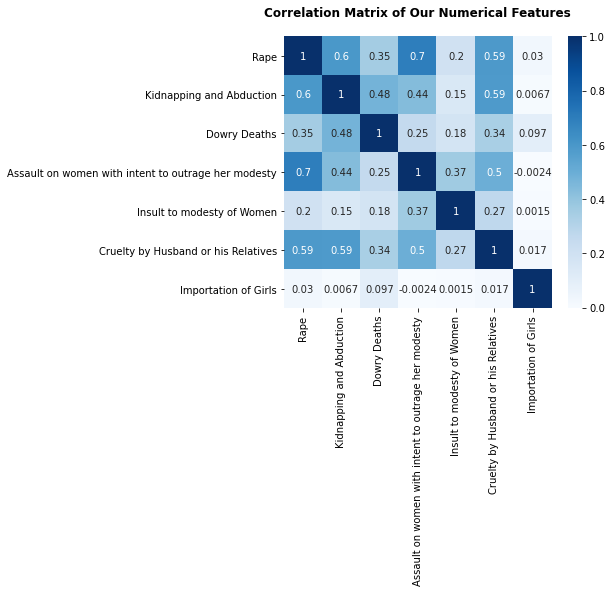

In [43]:
# showing correlation coefficients between variables
df2=df
df2.reset_index()
corrMatrix = df2[['Rape','Kidnapping and Abduction','Dowry Deaths','Assault on women with intent to outrage her modesty','Insult to modesty of Women','Cruelty by Husband or his Relatives','Importation of Girls']].corr()
fig, ax = plt.subplots(figsize=(6,5))  # Sample figsize in inches
# Visualize the correlation matrix
plt.title('Correlation Matrix of Our Numerical Features', pad=20, fontweight='bold') # pad gives the offset of the title from the top of the axes
chart = sns.heatmap(corrMatrix, cmap='Blues', annot=True)

### Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score # accuracy

In [48]:
x = df1[['Year']]
y = df1['Cruelty by Husband or his Relatives']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False, random_state=0)

In [49]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [50]:
# r2_score: used to evaluate the performance of a regression-based machine learning model
r2_score(y_test, y_pred)

0.3772764048007634

### Time series

In [51]:
'''
https://colab.research.google.com/drive/1h-tLMIxVaa8S6vJfOCQJpvUEZAUq-pJ_
'''

'\nhttps://colab.research.google.com/drive/1h-tLMIxVaa8S6vJfOCQJpvUEZAUq-pJ_\n'